Cluster Analysis - Male Web Traffic

The goal was understanding the male audience traffic on a website. Data included gender, average income of the area, the amount of time spent on the internet, and the amount of time spent on the website. Various ads from one company were displayed to each user. 

The analysis shows that males who spent a longer time on the website daily did not click on many ads. This group is slightly younger, spends a longer time surfing the internet, and reside in high income areas. Males that were older and that spent less time on the website clicked on ads. Since the audience skews slightly younger, the ads may not be appealing to that age group.

In [ ]:
#used to find patterns in datasets - clustering model (unsupervised)

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
#scale the data, initialize random centroids, label each data point based on distance from centroid, update centroids
#repeat steps 3 and 4 until convergence

In [3]:
#get random centroid - select random data point from dataframe
def random_centroids(data,k):
    centroids = []
    for i in range(k):
        centroid = df1.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids,axis=1)

In [4]:
#find euclidean distance between data points and the cluster center - then choose the closest distance
def get_labels(data,centroids):
    distance = centroids.apply(lambda x: np.sqrt(((df1-x) **2).sum(axis =1)))
    return distance.idxmin(axis=1)

In [5]:
#find the geometric mean - will need to transpose - spliting up data by labels and for each group
#apply geometric mean to each feature 
def new_centroids(data,labels,k):
    return df1.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [6]:
#plot data as 2 dimensional plot
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components =2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

In [15]:
#import sales dataset
sales = pd.read_csv("advertising.csv")#sheet_name = "advertising")

In [17]:
sales.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0


In [19]:
charc =["Daily Time Spent on Site","Age","Area Income","Daily Internet Usage"]

In [21]:
sales = sales.dropna(subset=charc)

In [23]:
df1 = sales[charc].copy()

In [25]:
#scale data points so they can be compared (1-10)
df1 =(df1-df1.min())/(df1.max()-df1.min())*9+1

In [27]:
df1.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.956685,4.644786,6.635075,5.098444
std,2.425336,1.882620,1.843561,2.392064
min,1.000000,1.000000,1.000000,1.000000
25%,3.869964,3.142857,5.540013,2.855249
50%,6.448496,4.428571,6.911624,5.268979
75%,8.029194,5.928571,8.074046,7.212087
max,10.000000,10.000000,10.000000,10.000000


In [29]:
df1.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
995,7.175931,3.357143,8.886792,6.655648
996,3.860785,6.571429,8.391718,2.614965
997,3.911270,7.857143,4.905629,1.849437
998,4.510964,1.000000,4.837611,5.531602
999,2.898521,2.500000,3.182278,5.008536


In [31]:
centroids = random_centroids(df1,3)

C:\Users\nitpi\AppData\Local\Temp\ipykernel_8968\2208229538.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = df1.apply(lambda x: float(x.sample()))


In [33]:
centroids

,0,1,2
Daily Time Spent on Site,8.220806,2.529832,3.115757
Age,4.428571,6.142857,2.928571
Area Income,5.134107,6.907747,6.790355
Daily Internet Usage,7.545950,8.441700,2.274428


In [35]:
labels = get_labels(df1, centroids)

In [232]:
labels.value_counts()

2    539
1    297
0    164
Name: count, dtype: int64

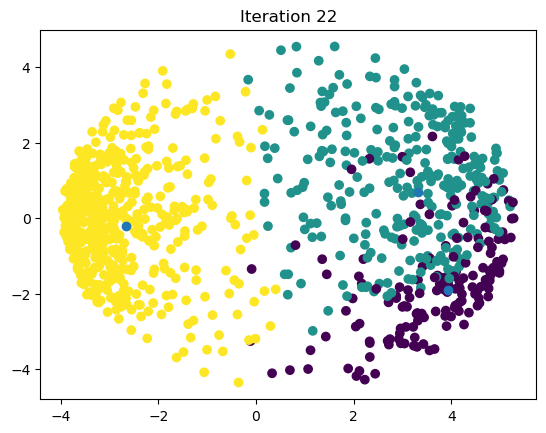

In [220]:
max_iterations = 100
k = 3
centroids = random_centroids(df1,k)
old_centroids = pd.DataFrame()
iteration = 1
while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(df1,centroids)
    centroids = new_centroids(df1,labels, k)
    plot_clusters(df1, labels, centroids, iteration)
    iteration += 1

In [222]:
centroids

,0,1,2
Daily Time Spent on Site,2.313505,4.392362,7.579193
Age,4.889192,5.693087,3.467082
Area Income,4.109677,6.128408,7.286825
Daily Internet Usage,3.859792,2.210187,6.749071


In [224]:
males = sales[sales['Male']==1]

In [235]:
males.pivot_table(index=labels, aggfunc={'Daily Time Spent on Site':'mean','Clicked on Ad': 'sum',
                                                      'Age': 'mean','Area Income':'mean','Daily Internet Usage':'mean','Male':'sum'})

,Age,Area Income,Clicked on Ad,Daily Internet Usage,Daily Time Spent on Site,Male
0,38.265823,40335.822025,79,158.387215,42.398101,79
1,43.120301,53395.031729,133,130.270075,54.776617,133
2,31.486989,60133.046543,19,213.218178,76.135019,269
